In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv('产品运营.csv') 

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

author_counts=df['author'].value_counts()[:10].sort_values(ascending=False) 
author = pd.DataFrame(author_counts)
fig = plt.figure(figsize=(14,7)) 
plt.bar(author.index, author.author,color = '#4584b6',edgecolor = '#4584b6') 

plt.title('top 10 author') 
plt.xlabel('author')
plt.ylabel('counts')
plt.show()

<Figure size 1400x700 with 1 Axes>

Text(0.5,1,'author_thumb')

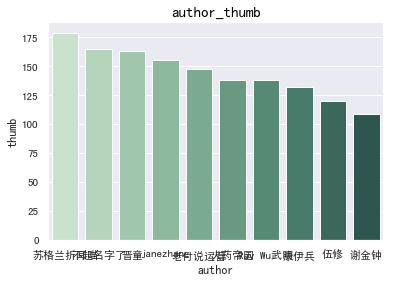

In [2]:
import seaborn as sns
sns.set(font='SimHei') 
pd_df = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False) [:10]
ax = sns.barplot(x='author', y='thumb',data=pd_df,palette=("ch:2.5,-.2,dark=.3")) 
plt.title('author_thumb', color='black', fontsize=15, weight='bold')

Text(0.5,1,'thumb with favorite count')

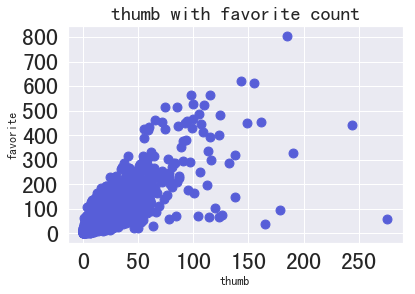

In [3]:
thumb_favorite = df[['thumb','favorite']]
ax4 = thumb_favorite.plot(kind = 'scatter',x='thumb',y='favorite',color = '#575ed8',s=80,fontsize=24)
ax4.set_title("thumb with favorite count",fontsize=20)

In [4]:
import plotly
import plotly.graph_objs as go
df2 = df.groupby(['author'])['favorite'].mean().reset_index().sort_values("favorite",ascending=False)
df2_1 =df2[:10]
data = [go.Bar(x=df2.author, y=df2_1.favorite)]
plotly.offline.plot(data, filename='author_with_favorite_bar-产品运营')

/Users/huashanzeng/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:621: UserWarning:

Your filename `author_with_favorite_bar-产品运营` didn't end with .html. Adding .html to the end of your file.



'file:///Users/huashanzeng/Untitled Folder/author_with_favorite_bar-产品运营.html'

In [5]:
import pyecharts
from pyecharts import Bar

df3 = df.groupby(['author'])['thumb'].mean().reset_index().sort_values("thumb",ascending=False)
df3_1 = df3[:10]
attr = df3_1.author
v2 = df3_1.thumb
bar = Bar("authors by thumb")
bar.add("thumb", attr, v2, mark_line=["average"])
attr = df2_1.author
v2 = df2_1.favorite
bar_1 = Bar("authors by favorite")
bar_1.add("by favorite", attr, v2, mark_line=["average"])

bar

In [6]:
bar_1

In [7]:
df["author"].describe()

count     2388
unique     779
top         米可
freq        59
Name: author, dtype: object

In [8]:
df[df["thumb"]>50].describe()

,Unnamed: 0,favorite,thumb
count,148.000000,148.000000,148.000000
mean,1271.067568,250.851351,81.418919
std,680.642280,143.037285,36.929979
min,65.000000,30.000000,51.000000
25%,695.000000,149.250000,57.750000
50%,1179.500000,222.500000,66.000000
75%,1970.250000,316.500000,94.250000
max,2327.000000,805.000000,276.000000


In [9]:
df[df["favorite"]>50].describe()

,Unnamed: 0,favorite,thumb
count,1128.000000,1128.000000,1128.000000
mean,1312.926418,116.500000,28.602837
std,667.050556,83.466192,26.067724
min,5.000000,51.000000,1.000000
25%,736.750000,66.000000,13.000000
50%,1363.000000,90.000000,21.000000
75%,1915.250000,132.250000,34.000000
max,2386.000000,805.000000,276.000000


In [2]:
df[(df["thumb"]>50)&(df["favorite"]>50)].describe()

,Unnamed: 0,favorite,thumb
count,145.000000,145.000000,145.000000
mean,1277.834483,255.234483,81.165517
std,683.118808,141.175128,36.547156
min,65.000000,53.000000,51.000000
25%,698.000000,154.000000,58.000000
50%,1180.000000,224.000000,66.000000
75%,1971.000000,318.000000,94.000000
max,2327.000000,805.000000,276.000000
